In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('../data_export/books_cleaned.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1998 non-null   int64  
 1   name               1998 non-null   object 
 2   price              1998 non-null   int64  
 3   original_price     1998 non-null   int64  
 4   rating_average     1998 non-null   float64
 5   review_count       1998 non-null   int64  
 6   author             1998 non-null   object 
 7   quantity_sold      1998 non-null   int64  
 8   inventory_status   1998 non-null   object 
 9   category_id        1998 non-null   int64  
 10  category_name      1998 non-null   object 
 11  Công ty phát hành  1922 non-null   object 
 12  Loại bìa           1706 non-null   object 
 13  Số trang           1629 non-null   object 
 14  Ngày xuất bản      1448 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 234.3+ KB


In [45]:
for col in df.columns:
  missing_data = df[col].isna().sum()
  if missing_data < 10000 and missing_data > 0:
   print(f'Cột {col} thiếu {missing_data} giá trị')

Cột Công ty phát hành thiếu 76 giá trị
Cột Loại bìa thiếu 292 giá trị
Cột Số trang thiếu 369 giá trị
Cột Ngày xuất bản thiếu 550 giá trị


In [46]:
df['Công ty phát hành'].fillna('Không rõ', inplace=True)

C:\Users\CEO\AppData\Local\Temp\ipykernel_3252\2850199255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Công ty phát hành'].fillna('Không rõ', inplace=True)


In [47]:
#df['Ngày xuất bản'] = pd.to_datetime(df['Ngày xuất bản'], format='%d/%m/%Y', errors='coerce')

In [48]:
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe()

,id,price,original_price,rating_average,review_count,quantity_sold,category_id
count,1998.0000,1998.0000,1998.0000,1998.0000,1998.0000,1998.0000,1998.0000
mean,185019243.0390,134836.0506,170675.7357,4.0597,136.8879,1353.6091,18520.4444
std,100499064.6064,107353.5417,130812.6188,1.8287,430.0297,4191.1772,28797.3781
min,342851.0000,2000.0000,2000.0000,0.0000,0.0000,0.0000,2.0000
25%,90516022.7500,76000.0000,98000.0000,4.7000,2.0000,40.2500,316.0000
50%,213703172.0000,113000.0000,148000.0000,5.0000,14.0000,182.0000,871.0000
75%,275853509.5000,159000.0000,199000.0000,5.0000,75.7500,803.7500,67335.0000
max,277728224.0000,1497000.0000,1750000.0000,5.0000,5476.0000,62004.0000,68257.0000


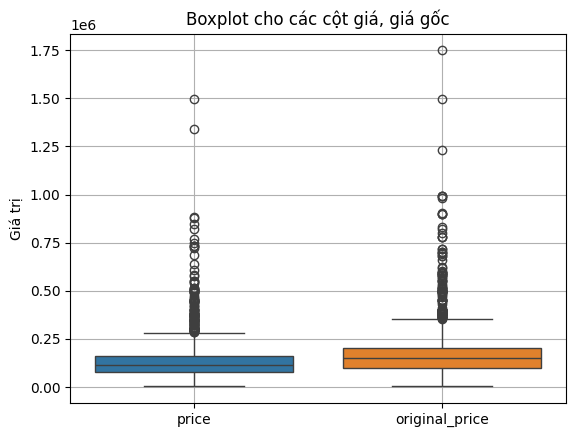

In [49]:
columns = ['price', 'original_price']
sns.boxplot(data=df[columns])

plt.title('Boxplot cho các cột giá, giá gốc')
plt.ylabel('Giá trị')
plt.grid(True)
plt.show()

In [50]:
#Tìm các giá trị outliers
#Tính IQR
Q1 = df['original_price'].quantile(0.25)
Q3 = df['original_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['original_price'] > upper_bound]

In [51]:
outliers = df[df['original_price'] > upper_bound]
print(outliers[['name', 'price', 'original_price', 'quantity_sold']])

                                                   name   price  \
8     Combo 4 cuốn: ChatGPT + ChatGPT thực chiến + A...  608000   
42    Hành Lang Hẹp - Nhà Nước, Xã Hội Và Vận Mệnh C...  340000   
75                                 Suối Nguồn (Tái Bản)  289000   
80    (Tập Thơ) NGƯỜI LÀ MỘT BÓNG CHIM KHUÊ TÚ - Ngu...  385000   
95    COMBO 4 - (TRÍ TUỆ CỦA NGƯỜI XƯA - ĐẠO LÝ NGƯỜ...  495000   
...                                                 ...     ...   
1963               Combo 2 Tập The Stand - Stephen King  574560   
1978  [bìa cứng] [Sách lịch sử có tranh minh họa] TH...  450000   
1984  Tư Vấn Bảo Hiểm - Những Kỹ Năng Không Ai Nói V...  880000   
1987                                             Sụp Đổ  273000   
1991  Harry Potter Và Chiếc Cốc Lửa - Tập 4 (Bản Đặc...  882000   

      original_price  quantity_sold  
8             716000              1  
42            397000            298  
75            380000          13171  
80            385000            264  
95   

=> Đây là những combo sách hoặc sách bản đặc biệt nên giá cao hơn là hoàn toàn hợp lý.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1998 non-null   int64  
 1   name               1998 non-null   object 
 2   price              1998 non-null   int64  
 3   original_price     1998 non-null   int64  
 4   rating_average     1998 non-null   float64
 5   review_count       1998 non-null   int64  
 6   author             1998 non-null   object 
 7   quantity_sold      1998 non-null   int64  
 8   inventory_status   1998 non-null   object 
 9   category_id        1998 non-null   int64  
 10  category_name      1998 non-null   object 
 11  Công ty phát hành  1998 non-null   object 
 12  Loại bìa           1706 non-null   object 
 13  Số trang           1998 non-null   int64  
 14  Ngày xuất bản      1448 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 234.3+ KB


In [54]:
#Do có 1 vài cột bị xuống dòng hoặc dính khoảng trắng nên khi transform trong PBI nó sẽ bị lỗi => phải xóa 
df = df.replace({r'\n': ' ', r'\r': ' '}, regex=True)

In [67]:
df['Số trang'] = df['Số trang'].fillna(0)

In [63]:
#Chuyển số trang về int. Và thấy có 1 giá trị là string. Tiến hành sửa nó
#Tìm thằng không phải số
check = pd.to_numeric(df['Số trang'], errors='coerce')
df_invalid = df[check.isna()]
print(df_invalid)

         id                                  name  price  original_price  \
679  473823  Sổ Lò Xo Grand B5 240 Trang Bìa Nhựa  42500           42500   

     rating_average  review_count    author  quantity_sold inventory_status  \
679          5.0000             6  Không rõ             82        available   

     category_id    category_name Công ty phát hành Loại bìa Số trang  \
679         1899  Sổ Tay Các Loại          Không rõ      NaN    240tr   

    Ngày xuất bản  
679           NaN  


In [64]:
df['Số trang'] = df['Số trang'].str.replace('240tr', '240', regex=True)

In [68]:
df['Số trang'] = df['Số trang'].astype(int) 

In [71]:
df.to_csv('../data_export/eda_books.csv', index=False, encoding='utf-8-sig')